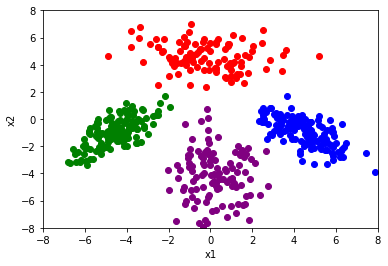

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m1 = [0, 4.5];
m2 = [-4.5, -1];
m3 = [4.5, -1];
m4 = [0, -4];


cvm1 = [[3.2, 0], [0, 1.2]];
cvm2 = [[1.2, 0.8], [0.8, 1.2]];
cvm3 = [[1.2, -0.8], [-0.8, 1.2]];
cvm4 = [[1.2, 0], [0, 3.2]];

n1 = 105;
n2 = 145;
n3 = 135;
n4 = 115;

samples1 = np.random.multivariate_normal(m1, cvm1, n1);
samples2 = np.random.multivariate_normal(m2, cvm2, n2);
samples3 = np.random.multivariate_normal(m3, cvm3, n3);
samples4 = np.random.multivariate_normal(m4, cvm4, n4);

for dot in samples1:
  plt.plot(dot[0], dot[1], 'o', color = 'red');
for dot in samples2:
  plt.plot(dot[0], dot[1], 'o', color = 'green');
for dot in samples3:
  plt.plot(dot[0], dot[1], 'o', color = 'blue');
for dot in samples4:
  plt.plot(dot[0], dot[1], 'o', color = 'purple');
plt.xlim([-8, 8]);
plt.ylim([-8, 8]);
plt.xlabel("x1");
plt.ylabel("x2");

In [ ]:
sum1 = [0, 0];
sum2 = [0, 0];
sum3 = [0, 0];
sum4 = [0, 0];

for dot in samples1:
  x = dot[0];
  y = dot[1];
  sum1[0] += x;
  sum1[1] += y;
for dot in samples2:
  x = dot[0];
  y = dot[1];
  sum2[0] += x;
  sum2[1] += y;
for dot in samples3:
  x = dot[0];
  y = dot[1];
  sum3[0] += x;
  sum3[1] += y;
for dot in samples4:
  x = dot[0];
  y = dot[1];
  sum4[0] += x;
  sum4[1] += y;

mean1 = [(sum1[0] / n1), (sum1[1] / n1)];
mean2 = [(sum2[0] / n2), (sum2[1] / n2)];
mean3 = [(sum3[0] / n3), (sum3[1] / n3)];
mean4 = [(sum1[0] / n4), (sum4[1] / n4)];

sample_means = [mean1, mean2, mean3, mean4];

sumM1 = [[0, 0], [0, 0]];
sumM2 = [[0, 0], [0, 0]];
sumM3 = [[0, 0], [0, 0]];
sumM4 = [[0, 0], [0, 0]];

for dot in samples1:
  dotX = dot[0];
  dotY = dot[1];
  meanX = mean1[0];
  meanY = mean1[1];
  valX = dotX - meanX;
  valY = dotY - meanY;
  firstM = [[valX], [valY]];
  secondM = [[valX, valY]];
  mult = np.matmul(firstM, secondM);
  sumM1 = np.add(sumM1, mult);
sumM1 = np.divide(sumM1, n1);

for dot in samples2:
  dotX = dot[0];
  dotY = dot[1];
  meanX = mean2[0];
  meanY = mean2[1];
  valX = dotX - meanX;
  valY = dotY - meanY;
  firstM = [[valX], [valY]];
  secondM = [[valX, valY]];
  mult = np.matmul(firstM, secondM);
  sumM2 = np.add(sumM2, mult);
sumM2 = np.divide(sumM2, n1);

for dot in samples3:
  dotX = dot[0];
  dotY = dot[1];
  meanX = mean3[0];
  meanY = mean3[1];
  valX = dotX - meanX;
  valY = dotY - meanY;
  firstM = [[valX], [valY]];
  secondM = [[valX, valY]];
  mult = np.matmul(firstM, secondM);
  sumM3 = np.add(sumM3, mult);
sumM3 = np.divide(sumM3, n1);

for dot in samples4:
  dotX = dot[0];
  dotY = dot[1];
  meanX = mean4[0];
  meanY = mean4[1];
  valX = dotX - meanX;
  valY = dotY - meanY;
  firstM = [[valX], [valY]];
  secondM = [[valX, valY]];
  mult = np.matmul(firstM, secondM);
  sumM4 = np.add(sumM4, mult);
sumM4 = np.divide(sumM4, n1);

sample_covariances = [sumM1, sumM2, sumM3, sumM4];

p1len = len(samples1);
p2len = len(samples2);
p3len = len(samples3);
p4len = len(samples4);
totallen = p1len + p2len + p3len + p4len;

p1 = p1len / totallen;
p2 = p2len / totallen;
p3 = p3len / totallen;
p4 = p4len / totallen;

class_priors = [p1, p2, p3, p4];

print(sample_means);
print(sample_covariances);
print(class_priors);


[[-0.21419565282562564, 4.602627502339627], [-4.555819324546943, -0.9675823602294825], [4.426132789341737, -0.9319562466623695], [-0.19556994388426688, -4.144058802466513]]
[array([[ 3.08892611, -0.36994352],
       [-0.36994352,  1.0277148 ]]), array([[1.36410532, 0.97273658],
       [0.97273658, 1.5038913 ]]), array([[ 1.6349466 , -0.98271761],
       [-0.98271761,  1.35826424]]), array([[ 1.38915068, -0.06146163],
       [-0.06146163,  3.61625535]])]
[0.21, 0.29, 0.27, 0.23]


In [ ]:
mean_1 = [mean1[0], mean1[1]];
mean_2 = [mean2[0], mean2[1]];
mean_3 = [mean3[0], mean3[1]];
mean_4 = [mean4[0], mean4[1]];

one_cv_inv = np.linalg.inv(sumM1);
two_cv_inv = np.linalg.inv(sumM2);
three_cv_inv = np.linalg.inv(sumM3);
four_cv_inv = np.linalg.inv(sumM4);

wcB1 = np.multiply(-0.5, one_cv_inv);
wcS1 = np.dot(one_cv_inv, mean_1);
wcST1 = np.transpose(wcS1);
wc01 = np.dot(np.dot(np.multiply(-0.5, np.transpose(mean_1)), one_cv_inv), mean_1);

wcB2 = np.multiply(-0.5, two_cv_inv);
wcS2 = np.dot(two_cv_inv, mean_2);
wcST2 = np.transpose(wcS2);
wc02 = np.dot(np.dot(np.multiply(-0.5, np.transpose(mean_2)), two_cv_inv), mean_2);

wcB3 = np.multiply(-0.5, three_cv_inv);
wcS3 = np.dot(three_cv_inv, mean_3);
wcST3 = np.transpose(wcS3);
wc03 = np.dot(np.dot(np.multiply(-0.5, np.transpose(mean_3)), three_cv_inv), mean_3);

wcB4 = np.multiply(-0.5, four_cv_inv);
wcS4 = np.dot(four_cv_inv, mean_4);
wcST4 = np.transpose(wcS4);
wc04 = np.dot(np.dot(np.multiply(-0.5, np.transpose(mean_4)), one_cv_inv), mean_4);

actual_reds = [0, 0, 0, 0];
actual_greens = [0, 0, 0, 0];
actual_blues = [0, 0, 0, 0];
actual_purples = [0, 0, 0, 0];

for dot in samples1:
  x = dot[0];
  y = dot[1];

  xT = [[x, y]];
  xN = [[x], [y]];

  one1 = np.dot(np.dot(xT, wcB1), xN)[0][0];
  two1 = np.dot(wcST1, xN)[0];
  three1 = wc01;

  one2 = np.dot(np.dot(xT, wcB2), xN)[0][0];
  two2 = np.dot(wcST2, xN)[0];
  three2 = wc02;

  one3 = np.dot(np.dot(xT, wcB3), xN)[0][0];
  two3 = np.dot(wcST3, xN)[0];
  three3 = wc03;

  one4 = np.dot(np.dot(xT, wcB4), xN)[0][0];
  two4 = np.dot(wcST4, xN)[0];
  three4 = wc04;


  g1_score = one1 + two1 + three1;
  g2_score = one2 + two2 + three2;
  g3_score = one3 + two3 + three3;
  g4_score = one4 + two4 + three4;

  max = np.amax([g1_score, g2_score, g3_score, g4_score]);
  prediction = "";

  if max == g1_score:
    prediction = "red";
  if max == g2_score:
    prediction = "green";
  if max == g3_score:
    prediction = "blue";
  if max == g4_score:
    prediction = "purple";

  if prediction == "red":
    actual_reds[0] += 1;
  if prediction == "green":
    actual_reds[1] += 1;
  if prediction == "blue":
    actual_reds[2] += 1;
  if prediction == "purple":
    actual_reds[3] += 1;


for dot in samples2:
  x = dot[0];
  y = dot[1];

  xT = [[x, y]];
  xN = [[x], [y]];

  one1 = np.dot(np.dot(xT, wcB1), xN)[0][0];
  two1 = np.dot(wcST1, xN)[0];
  three1 = wc01;

  one2 = np.dot(np.dot(xT, wcB2), xN)[0][0];
  two2 = np.dot(wcST2, xN)[0];
  three2 = wc02;

  one3 = np.dot(np.dot(xT, wcB3), xN)[0][0];
  two3 = np.dot(wcST3, xN)[0];
  three3 = wc03;

  one4 = np.dot(np.dot(xT, wcB4), xN)[0][0];
  two4 = np.dot(wcST4, xN)[0];
  three4 = wc04;


  g1_score = one1 + two1 + three1;
  g2_score = one2 + two2 + three2;
  g3_score = one3 + two3 + three3;
  g4_score = one4 + two4 + three4;

  max = np.amax([g1_score, g2_score, g3_score, g4_score]);
  prediction = "";

  if max == g1_score:
    prediction = "red";
  if max == g2_score:
    prediction = "green";
  if max == g3_score:
    prediction = "blue";
  if max == g4_score:
    prediction = "purple";

  if prediction == "red":
    actual_greens[0] += 1;
  if prediction == "green":
    actual_greens[1] += 1;
  if prediction == "blue":
    actual_greens[2] += 1;
  if prediction == "purple":
    actual_greens[3] += 1;

for dot in samples3:
  x = dot[0];
  y = dot[1];

  xT = [[x, y]];
  xN = [[x], [y]];

  one1 = np.dot(np.dot(xT, wcB1), xN)[0][0];
  two1 = np.dot(wcST1, xN)[0];
  three1 = wc01;

  one2 = np.dot(np.dot(xT, wcB2), xN)[0][0];
  two2 = np.dot(wcST2, xN)[0];
  three2 = wc02;

  one3 = np.dot(np.dot(xT, wcB3), xN)[0][0];
  two3 = np.dot(wcST3, xN)[0];
  three3 = wc03;

  one4 = np.dot(np.dot(xT, wcB4), xN)[0][0];
  two4 = np.dot(wcST4, xN)[0];
  three4 = wc04;


  g1_score = one1 + two1 + three1;
  g2_score = one2 + two2 + three2;
  g3_score = one3 + two3 + three3;
  g4_score = one4 + two4 + three4;

  max = np.amax([g1_score, g2_score, g3_score, g4_score]);
  prediction = "";

  if max == g1_score:
    prediction = "red";
  if max == g2_score:
    prediction = "green";
  if max == g3_score:
    prediction = "blue";
  if max == g4_score:
    prediction = "purple";

  if prediction == "red":
    actual_blues[0] += 1;
  if prediction == "green":
    actual_blues[1] += 1;
  if prediction == "blue":
    actual_blues[2] += 1;
  if prediction == "purple":
    actual_blues[3] += 1;


for dot in samples4:
  x = dot[0];
  y = dot[1];

  xT = [[x, y]];
  xN = [[x], [y]];

  one1 = np.dot(np.dot(xT, wcB1), xN)[0][0];
  two1 = np.dot(wcST1, xN)[0];
  three1 = wc01;

  one2 = np.dot(np.dot(xT, wcB2), xN)[0][0];
  two2 = np.dot(wcST2, xN)[0];
  three2 = wc02;

  one3 = np.dot(np.dot(xT, wcB3), xN)[0][0];
  two3 = np.dot(wcST3, xN)[0];
  three3 = wc03;

  one4 = np.dot(np.dot(xT, wcB4), xN)[0][0];
  two4 = np.dot(wcST4, xN)[0];
  three4 = wc04;


  g1_score = one1 + two1 + three1;
  g2_score = one2 + two2 + three2;
  g3_score = one3 + two3 + three3;
  g4_score = one4 + two4 + three4;

  max = np.amax([g1_score, g2_score, g3_score, g4_score]);
  prediction = "";

  if max == g1_score:
    prediction = "red";
  if max == g2_score:
    prediction = "green";
  if max == g3_score:
    prediction = "blue";
  if max == g4_score:
    prediction = "purple";

  if prediction == "red":
    actual_purples[0] += 1;
  if prediction == "green":
    actual_purples[1] += 1;
  if prediction == "blue":
    actual_purples[2] += 1;
  if prediction == "purple":
    actual_purples[3] += 1;



print(actual_reds);
print(actual_greens);
print(actual_blues);
print(actual_purples);
print()
print("confusion matrix:")


print("y_ truth   1   2   3   4")
print("y_pred")
print("1         "+ str(actual_reds[0]) + "  " + str(actual_greens[0]) + "   " + str(actual_blues[0]) + "   " + str(actual_purples[0]));
print("2         "+ str(actual_reds[1]) + "  " + str(actual_greens[1]) + "   " + str(actual_blues[1]) + "   " + str(actual_purples[1]));
print("3         "+ str(actual_reds[2]) + "  " + str(actual_greens[2]) + "   " + str(actual_blues[2]) + "   " + str(actual_purples[2]));
print("4         "+ str(actual_reds[3]) + "  " + str(actual_greens[3]) + "   " + str(actual_blues[3]) + "   " + str(actual_purples[3]));

[105, 0, 0, 0]
[0, 145, 0, 0]
[0, 0, 135, 0]
[0, 1, 4, 110]

confusion matrix:
y_ truth   1   2   3   4
y_pred
1         105  0   0   0
2         0  145   0   1
3         0  0   135   4
4         0  0   0   110
